Calculations statistics of element distribution by the holes, with normalized sqlite database.

In [36]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt  
import os 
import re

#Scott Halley's geochemistry data in normilized sqqlite database is in geo3.db file
ls_db_file_name = 'geo3.db' 
#create empty dataframe
df = pd.DataFrame(None)
#create database connection
connect_db = sqlite3.connect(ls_db_file_name)
#lest get a elements_list from table 'elements'
ls_sql0 = "select name from elements"
cur = connect_db.cursor()
cur.execute(ls_sql0)
elements_list = cur.fetchall() # list of elements in elements_list

In [37]:
#function f_plot_drill_scatter creates  jpg scatter diagrams one of 3 types S(D),K(D),S(K)
#arguments:
#as_element_name - value like  "Ag"
#as_type - value like  "S(K)" 
#as_sub_folder - subfolder with jpg Scattergram
#connect_db - database connection object
#f_plot_drill_scatter(ls_tmp_element_name,'E(A)',connect_db)
def f_plot_drill_scatter(as_element_name,as_type, as_sub_folder, connect_db):   
    #clear local variables
    ls_tmp_element_name = as_element_name
    ls_main=''
    df = pd.DataFrame(None)
    print(ls_tmp_element_name)
    # adds "main" word to diagram title for main elements  
    if ls_tmp_element_name in ['Al','Ca','Fe','K','Mg','Na','S','Ti','SiO2']:
        ls_main='main '
    # assemble sql query into ls_sql1 to extract data for element distribution by holes 
    ls_sql1 = "select t1.* ,t2.description as desc,t2.mark as mark "+ \
            "from distrib_properties t1 ,assumptions t2 "+ \
            "where t1.assumption_ref = t2.id and t1.element_ref in  "+ \
             " (select t2.id from elements t2 where t2.name= '"+ ls_tmp_element_name+"')"
    # execute ls_Sql to dataframe df
    query = connect_db.execute(ls_sql1)
    cols = [column[0] for column in query.description]
    df = pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
    # preparing diagram titles and axis names
    plt.clf()
    if as_type == 'S(D)':
        ls_chart_name = ls_main + ls_tmp_element_name + ' S(SD)'
        ls_x_label = 'Standard deviation'  
        ls_y_label = 'Skewness'
        ls_file_name2='-0-S(SD)'
    elif as_type == 'K(D)':
        ls_chart_name = ls_main + ls_tmp_element_name + ' K(SD)'
        ls_x_label = 'Standard deviation'
        ls_y_label = 'Kurtosis'     
        ls_file_name2='-1-K(SD)'      
    elif as_type == 'K(S)':
        ls_chart_name = ls_main + ls_tmp_element_name + ' K(S)'
        ls_x_label = 'Skewness'
        ls_y_label = 'Kurtosis'
        ls_file_name2='-2-K(S)'         
    else:#if as_type not in S(D),K(D),S(K) then do nothing and exit
        return 
    # plotting a scatter diagram    

    fig = plt.figure(figsize=(10,5))
    plt.title(ls_chart_name) 
    print (ls_chart_name+ls_tmp_element_name)
    plt.xlabel(ls_x_label)
    plt.ylabel(ls_y_label)
    #plt.axis([-1, 10, -1, 5])
    for i in range(0,len(df)): 
            if df['desc'][i] == 'all':
                ls_tmp_color='red' 
            else:
                ls_tmp_color='blue'
            if as_type == 'S(D)':    
                plt.scatter(df['std_deviation'][i], df['skewness'][i],color = ls_tmp_color) #df['mark'][i]
                plt.text(df['std_deviation'][i], df['skewness'][i]+0.1, df['desc'][i], horizontalalignment='left', size='small', color='black')
            elif as_type == 'K(D)': 
                plt.scatter(df['std_deviation'][i], df['kurtosis'][i],color = ls_tmp_color) #df['mark'][i]
                plt.text(df['std_deviation'][i], df['kurtosis'][i]+0.1, df['desc'][i], horizontalalignment='left', size='small', color='black')
            elif as_type == 'K(S)':                
                plt.scatter(df['skewness'][i], df['kurtosis'][i],color = ls_tmp_color) #df['mark'][i]
                plt.text(df['skewness'][i], df['kurtosis'][i]+0.1, df['desc'][i], horizontalalignment='left', size='small', color='black')
    # save diagram  to jpg file              
    plt.savefig(as_sub_folder+'/'+ls_tmp_element_name+ls_file_name2+'.jpg',bbox_inches='tight', dpi=150)


In [38]:
#specify subfolder where you want to create pictures
ls_sub_folder='pic' #pictures with diagram will be uploaded to this subfolder
if not(os.path.isdir(ls_sub_folder)) :
    os.mkdir(ls_sub_folder)

Ag
Ag S(SD)Ag
Ag
Ag K(SD)Ag
Ag
Ag K(S)Ag
Al
main Al S(SD)Al
Al
main Al K(SD)Al
Al
main Al K(S)Al
As
As S(SD)As
As
As K(SD)As
As
As K(S)As
Ba
Ba S(SD)Ba
Ba
Ba K(SD)Ba
Ba
Ba K(S)Ba
Be
Be S(SD)Be
Be
Be K(SD)Be
Be
Be K(S)Be
Bi
Bi S(SD)Bi
Bi
Bi K(SD)Bi
Bi
Bi K(S)Bi
Ca
main Ca S(SD)Ca
Ca
main Ca K(SD)Ca


C:\Users\b_malahov\AppData\Local\Temp\ipykernel_7352\2479899987.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,5))


Ca
main Ca K(S)Ca
Cd
Cd S(SD)Cd
Cd
Cd K(SD)Cd
Cd
Cd K(S)Cd
Ce
Ce S(SD)Ce
Ce
Ce K(SD)Ce
Ce
Ce K(S)Ce
Co
Co S(SD)Co
Co
Co K(SD)Co
Co
Co K(S)Co
Cr
Cr S(SD)Cr
Cr
Cr K(SD)Cr
Cr
Cr K(S)Cr
Cs
Cs S(SD)Cs
Cs
Cs K(SD)Cs
Cs
Cs K(S)Cs
Fe
main Fe S(SD)Fe
Fe
main Fe K(SD)Fe
Fe
main Fe K(S)Fe
Ga
Ga S(SD)Ga
Ga
Ga K(SD)Ga
Ga
Ga K(S)Ga
Ge
Ge S(SD)Ge
Ge
Ge K(SD)Ge
Ge
Ge K(S)Ge
Hf
Hf S(SD)Hf
Hf
Hf K(SD)Hf
Hf
Hf K(S)Hf
In
In S(SD)In
In
In K(SD)In
In
In K(S)In
K
main K S(SD)K
K
main K K(SD)K
K
main K K(S)K
La
La S(SD)La
La
La K(SD)La
La
La K(S)La
Li
Li S(SD)Li
Li
Li K(SD)Li
Li
Li K(S)Li
Mg
main Mg S(SD)Mg
Mg
main Mg K(SD)Mg
Mg
main Mg K(S)Mg
Mn
Mn S(SD)Mn
Mn
Mn K(SD)Mn
Mn
Mn K(S)Mn
Mo
Mo S(SD)Mo
Mo
Mo K(SD)Mo
Mo
Mo K(S)Mo
Na
main Na S(SD)Na
Na
main Na K(SD)Na
Na
main Na K(S)Na
Nb
Nb S(SD)Nb
Nb
Nb K(SD)Nb
Nb
Nb K(S)Nb
Ni
Ni S(SD)Ni
Ni
Ni K(SD)Ni
Ni
Ni K(S)Ni
P
P S(SD)P
P
P K(SD)P
P
P K(S)P
Pb
Pb S(SD)Pb
Pb
Pb K(SD)Pb
Pb
Pb K(S)Pb
Rb
Rb S(SD)Rb
Rb
Rb K(SD)Rb
Rb
Rb K(S)Rb
Re
Re S(SD)Re
Re
Re K(SD)Re
Re
Re K(S)

<Figure size 432x288 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

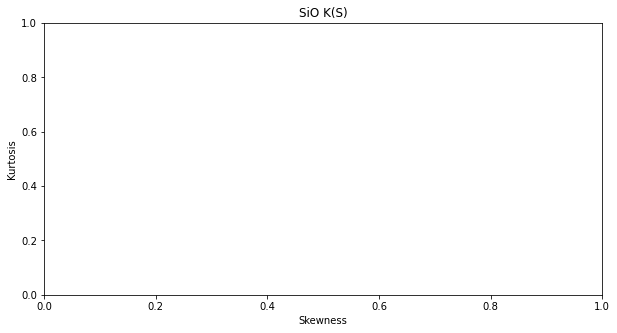

In [39]:
#generate 144 diagrams in pic folder ls_sub_folder
for i in range(0, len(elements_list)):
#for i in range(0, 1):    
    #this regexp clears elements_list from extra characters
    reg = re.compile('[^a-zA-Z ]')
    ls_tmp_element_name=reg.sub('', str(elements_list[i]))   
    #create 3 diagram files to each element 
    f_plot_drill_scatter(ls_tmp_element_name,'S(D)',ls_sub_folder,connect_db)
    f_plot_drill_scatter(ls_tmp_element_name,'K(D)',ls_sub_folder,connect_db)
    f_plot_drill_scatter(ls_tmp_element_name,'K(S)',ls_sub_folder,connect_db)        

In [35]:
"Let's analyse 144 scatter diagrams in subfolder ../"+ls_sub_folder

"Let's analyse 144 scatter diagrams in subfolder ../pic"